In [1]:
from sklearn import linear_model

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv('USA_Housing.csv')

In [7]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
df.isnull().sum()  # there are no null values

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [10]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


D:\Persnol_Documents\TOOLS\temp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

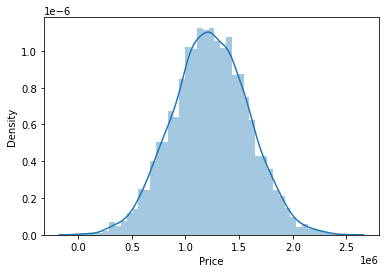

In [11]:
sns.distplot(df['Price'])

<AxesSubplot:>

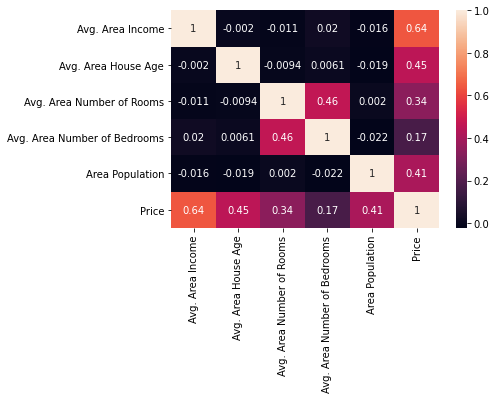

In [12]:
# df.corr()
sns.heatmap(df.corr(),annot=True)

In [13]:
# reg = linear_model.LinearRegression()

In [14]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
# this is test data attributes

In [17]:
y = df['Price'] # this is test data output

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 101)
# here test size = 0.4 indicates that 40% of the data will be used as test data
# random_state = 101 indicates that specific set of random split 

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
lm.intercept_

-2640159.7968529635

In [23]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf


,coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [24]:
'''
table shows:
for eg.
if other factors kept same and one unit of avg.Area Income increased by one unit will increase price by 21.528267
similarly -------------------------------- Avg.Area Number of bedrooms increased by one unit will increase price by 2233.801864
'''

'\ntable shows:\nfor eg.\nif other factors kept same and one unit of avg.Area Income increased by one unit will increase price by 21.528267\nsimilarly -------------------------------- Avg.Area Number of bedrooms increased by one unit will increase price by 2233.801864\n'

# predictions

In [25]:
predictions = lm.predict(X_test)

In [26]:
predictions

array([1260960.70567627,  827588.75560322, 1742421.24254348, ...,
        372191.40626904, 1365217.15140899, 1914519.54178898])

In [27]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1776    1.489520e+06
4269    7.777336e+05
1661    1.515271e+05
2410    1.343824e+06
2302    1.906025e+06
Name: Price, Length: 2000, dtype: float64

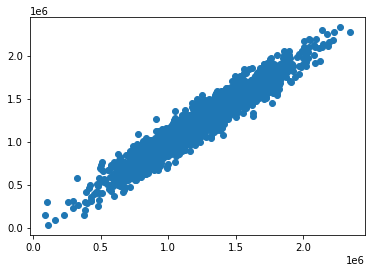

In [28]:
plt.scatter(predictions,y_test)
# kind of straight line path ==> more correct path

D:\Persnol_Documents\TOOLS\temp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\nnormal behaviour ==> more accurate\nie. normal distribution implies that error is less at exterame values(both positive and negative side)\nie. more values are near to zero and very less values are to the extreame position\n'

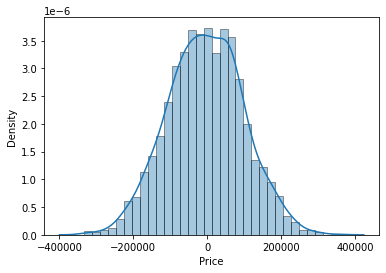

In [29]:
sns.distplot(y_test - predictions,hist_kws=dict(edgecolor="black"))
'''
normal behaviour ==> more accurate
ie. normal distribution implies that error is less at exterame values(both positive and negative side)
ie. more values are near to zero and very less values are to the extreame position
'''

In [30]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test,predictions)

82288.22251914945

In [32]:
metrics.mean_squared_error(y_test,predictions)

10460958907.208803

In [33]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922290811